In [1]:
!jt -t grade3 -ofs 18 -nfs 18 -tfs 24 -T

# ANN Building Blocks part 2

# Learning

##### Logistic regression ($\approx$ single neuron)
- closed form solution 
<br>
<br>
<br>
<br>
<br>

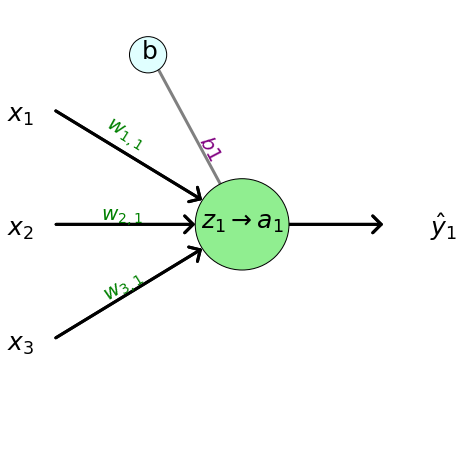

In [2]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'common_assets')))
import numpy as np
import matplotlib.pyplot as plt
from draw_neural_net import draw_neural_net

layer_sizes = [3,1,1]

weights = [
    np.array(
        [
            ["w_{1,1}"],
            ["w_{2,1}"], 
            ["w_{3,1}"],
        ]
    ),
    np.array(
        [
            [""]
        ]
    )

]
biases = [
    np.array(
        ["b1"]
    ), 
    np.array(
        ["b_2"]
    )
]
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.axis('off')

draw_neural_net(ax,
                layerSizes=layer_sizes, 
                weights=weights, 
                biases=biases, 
                hiddenLayerPrefix = "", 
                outLayerPrefix = "", 
                inLayerPrefix ="", 
                biasNodePrefix = "b",
                #inPrefix = "x", 
                #outPrefix = "\hat{}", 
                otherNodePrefix =  r"z_{m}\rightarrow a_{m}",
                hideInOutPutNodes=True,
                nodeFontSize = 25,
                edgeFontSize = 20, 
                edgeWidth = 3
               )

##### ANN (multiple neurons in layers)
- closed form does not work
- iterative optimization algorithm

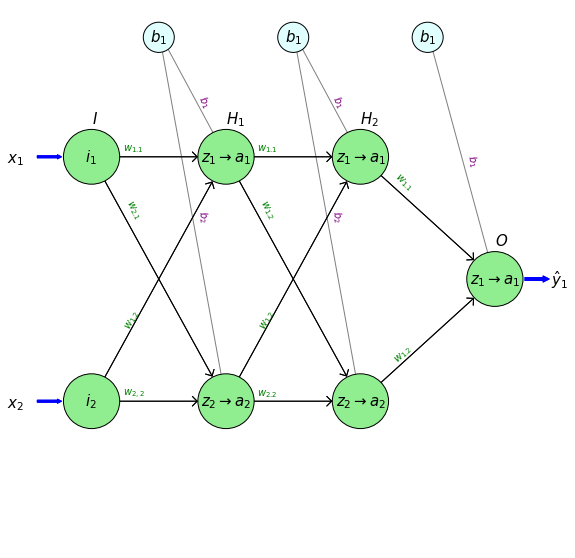

In [3]:
layer_sizes = [2, 2, 2, 1]
weights = [
    np.array(
        [
        
            [ "w_{1.1}",  "w_{2.1}" ],
            [ "w_{1.2}",  "w_{2,2}" ]
        ]
    ),
    np.array(
        [
            [ "w_{1.1}",  "w_{1.2}" ],
            [ "w_{1.2}",  "w_{2.2}" ]
        ]
    ),
    np.array(
        [
            [ "w_{1.1}" ],
            [ "w_{1.2}" ]
        ]
    )
]
biases = [
    np.array(
        [ "b_1",  "b_2" ]
    ), 
    np.array(
        [ "b_1" ,  "b_2" ]
    ),
    np.array(
        [ "b_1" ]
    )
    
]

fig = plt.figure(figsize=(10, 10))

ax = fig.gca()
ax.axis('off')

draw_neural_net(ax, 
                layerSizes=layer_sizes,
                weights= weights, 
                biases=biases)


#  Supervised Learning

## Task
Find optimal values for $w_{\cdot,j}$ and $b_j$ over all neurons $j$

## Tools
* Loss function 
   + (equiv. Cost/Error Function)
* Gradient descent
  + Back-propagation
* Cross-validation
    - Data
        - Training set
        - Test set



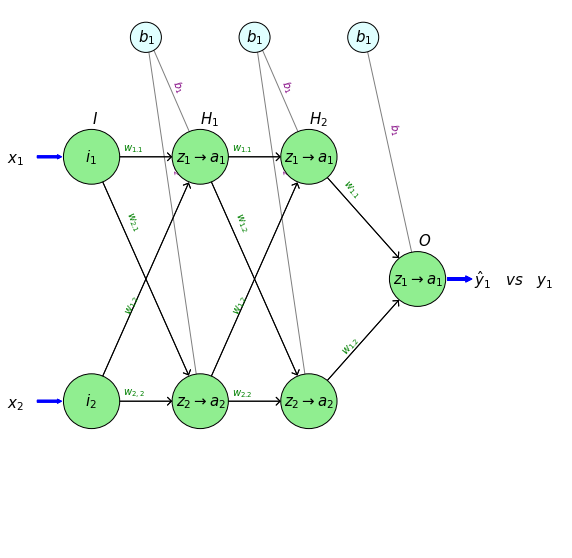

In [4]:
layer_sizes = [2, 2, 2, 1]
weights = [
    np.array(
        [
        
            [ "w_{1.1}",  "w_{2.1}" ],
            [ "w_{1.2}",  "w_{2,2}" ]
        ]
    ),
    np.array(
        [
            [ "w_{1.1}",  "w_{1.2}" ],
            [ "w_{1.2}",  "w_{2.2}" ]
        ]
    ),
    np.array(
        [
            [ "w_{1.1}" ],
            [ "w_{1.2}" ]
        ]
    )
]
biases = [
    np.array(
        [ "b_1",  "b_2" ]
    ), 
    np.array(
        [ "b_1" ,  "b_2" ]
    ),
    np.array(
        [ "b_1" ]
    )
    
]

fig = plt.figure(figsize=(10, 10))

ax = fig.gca()
ax.axis('off')

draw_neural_net(ax, 
                layerSizes=layer_sizes,
                weights= weights, 
                biases=biases,
                outputPrefix = r"\hat{y}_{m}\quad  vs\quad y_{m}"
               )





-  $x$ = input 
- $y$ **known** output corresponding to $x$
- (Recall: $\hat{y}$ is the **estimated** output)

# Loss Function 

Suppose we have

1. an ANN that, with input $x$, produces an estimated output $\hat{y}$ 
2. training samples $X=(x^{(1)},\ldots,x^{(K)})$ with true output values $Y=(y^{(1)},\ldots,y^{(K)})$. 

Then the **Quadratic Loss Function** is defined as follows:

1. For each $x\in X$, use the residual sum of squares, *RSS*, as an error measure

$$L(w,b|x) = \sum_i\frac{1}{2} \left( y_i-\hat{y}_i\right) ^2$$

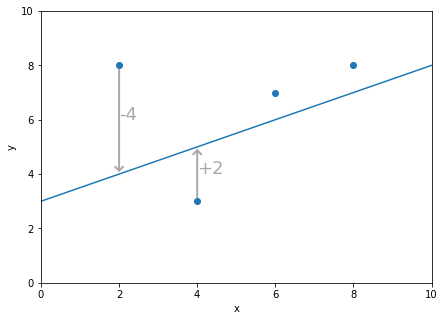

In [5]:
import random
from matplotlib import patches as mpatches

# Creating vectors x and  
a = 3
b = 0.5
n = 50
z = np.linspace(0, 10, n) 
w = [ a + b * zi for zi in z ] 

x = [ 2,4,6,8 ]
y = [ 8,3,7,8 ]

fig = plt.figure(figsize = (7, 5))
# Create the plot 
plt.scatter(x, y, zorder=8)
plt.xlabel('x') 
plt.ylabel('y') 
plt.plot(z, w)
plt.xlim((0,10))
plt.ylim((0,10))
plt.annotate("", xy=(2,4), xytext=(2,8),  
             arrowprops=dict(
                 arrowstyle=mpatches.ArrowStyle("->", 
                                                head_length=0.4,
                                                head_width=0.4),
                 color="darkgray", lw=2))
plt.text(2, 6, "-4", fontsize=18, color="darkgray", zorder=0)

plt.annotate("", xy=(4,5), xytext=(4,3),  
             arrowprops=dict(
                 arrowstyle=mpatches.ArrowStyle("->", 
                                                head_length=0.4,
                                                head_width=0.4),
                 color="darkgray", lw=2))
plt.text(4, 4, "+2", fontsize=18, color="darkgray", zorder=0)

#arrows(x1=2,y1=4,x0=2,y0=8, col="darkgray",lwd=5)
#text(x=2, y=6, labels="-4", cex=2, pos=4, col="darkgray")
#arrows(x1=4,y1=5,x0=4,y0=3, col="darkgray", lwd=5)
#text(x=4, y=4, labels="-2", cex=2, pos=4, col="darkgray")

# Show the plot 
plt.show() 

2. The full quadratic cost function is  simply the Mean Squared Error (MSE) used in cross-validation
\begin{eqnarray}
L(w,b) &=&  \frac{1}{K} \sum_{k=1}^K L(w,b|x^{(k)})\\
%&=& \frac{1}{2K}\sum_{k=1}^K \Vert Y(x_k)-a^{(L)}(X_k)\Vert ^2
\end{eqnarray}


# Gradient Descent
#### Optimization

Consider inverted hill-climbing in one dimension $v$, i.e., we want to find the minimum instead of the maximum.

#### *Hill-climbing* 
<br>
<br>

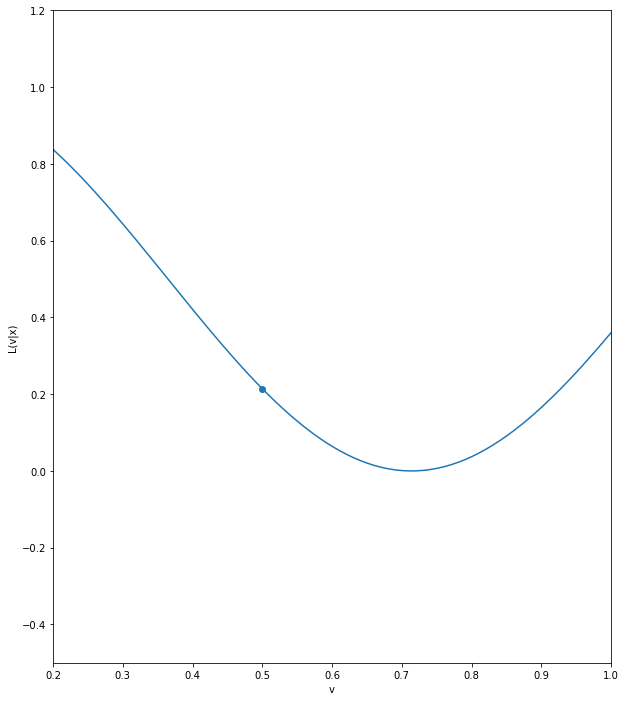

In [6]:
k=4.5
def f(x):
    return(np.sin(k * x +1.5) + 1) / 2
def fp(x):
    return k / 2* np.cos(k * x + 1.5)

n=1000
z = np.linspace(0, 10, n) 
w = [ f(zi) for zi in z ] 

x = 0.5
y = f(x)

figHill = plt.figure(figsize = (10, 12))

# Create the plot 
plt.scatter(x, y, zorder=8)
plt.xlabel('v') 
plt.ylabel('L(v|x)') 
plt.plot(z, w)
plt.xlim((0.2,1))
plt.ylim((-0.5,1.2))

plt.show()



<br>


# Gradient Descent
#### Optimization

Consider inverted hill-climbing in one dimension $v$, i.e., we want to find the minimum instead of the maximum.

#### *Hill-climbing* 
1. randomly choose direction and length to change $v$
2. stay if $L(v|x)$ got lower, else go back.

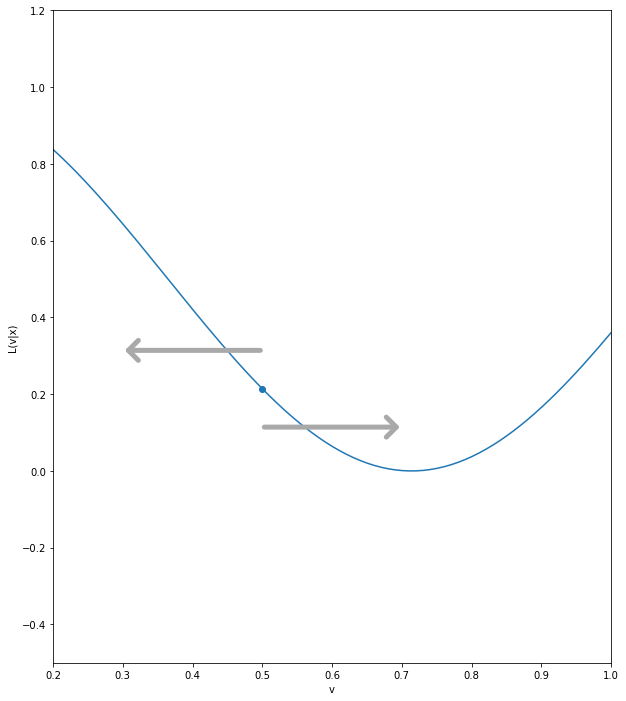

In [7]:
fig = plt.figure(figsize = (10, 12))
# Create the plot 
plt.scatter(x, y, zorder=8)
plt.xlabel('v') 
plt.ylabel('L(v|x)') 
plt.plot(z, w)
plt.xlim((0.2,1))
plt.ylim((-0.5,1.2))

e = 0.1
d = 0.2

plt.annotate("",  
             xy=(x-d,y+e),  
             xytext=(x,y+e),
             arrowprops=
             dict(
                 arrowstyle=mpatches.ArrowStyle("->", 
                                                head_length=1.,
                                                head_width=1.),
                 color="darkgray", 
                 lw=5))
a=plt.annotate("",  
             xy=(x+d,y-e),  
             xytext=(x,y-e),
             arrowprops=
             dict(
                 arrowstyle=mpatches.ArrowStyle("->", 
                                                head_length=1.,
                                                head_width=1.),
                 color="darkgray", 
                 lw=5))



###### We want to be smarter!

# Gradient Descent
#### Optimization

Consider inverted hill-climbing in one dimension $v$, i.e., we want to find the minimum instead of the maximum.

#### *Gradient descent*
<br>
<br>

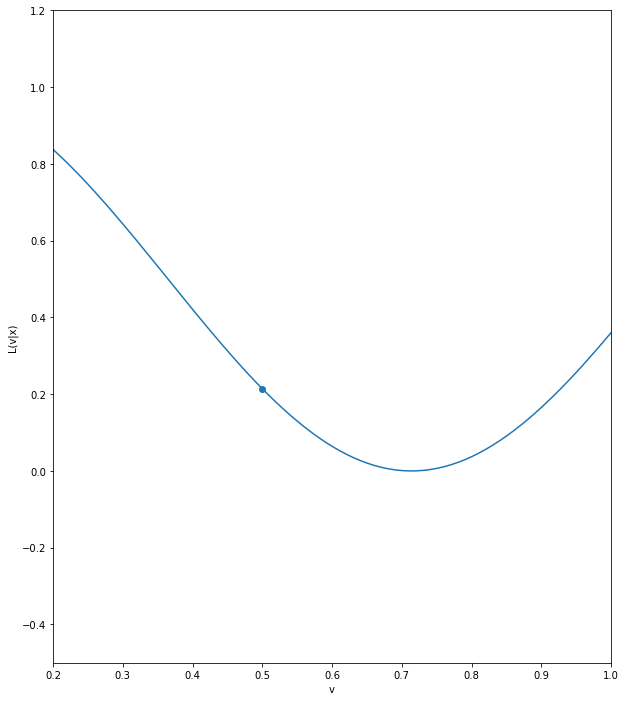

In [8]:
figHill

# Gradient Descent
#### Optimization

Consider inverted hill-climbing in one dimension $v$, i.e., we want to find the minimum instead of the maximum.

#### *Gradient descent*
1. compute the derivative $\frac{dL(v|x)}{dv}$ to see which way *down* is

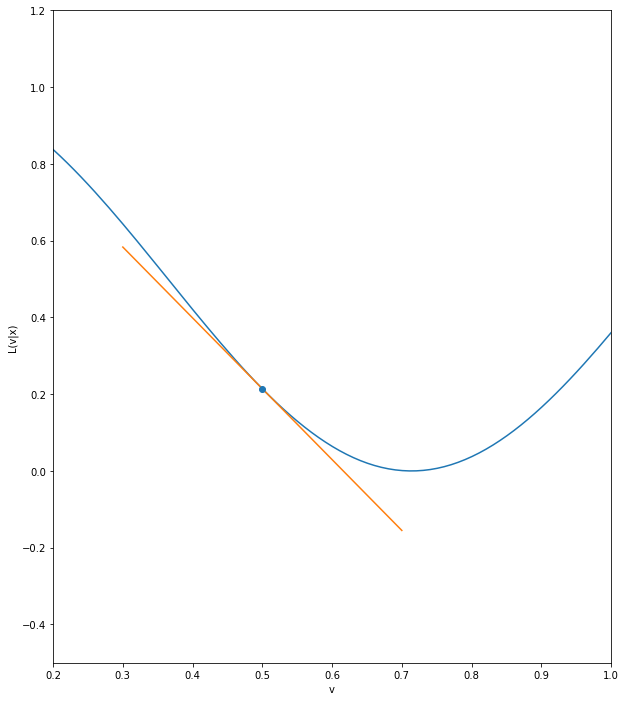

In [9]:
fig = plt.figure(figsize = (10, 12))

# Create the plot 
plt.scatter(x, y, zorder=8)
plt.xlabel('v') 
plt.ylabel('L(v|x)') 
plt.plot(z, w)
plt.xlim((0.2,1))
plt.ylim((-0.5,1.2))

n=50
z1 = np.linspace(x-0.2, x+0.2, n) 
w1 = [ fp(x)*zi + (f(x)-fp(x)*x) for zi in z1 ] 
A=plt.plot(z1, w1)





# Gradient Descent
#### Optimization

Consider inverted hill-climbing in one dimension $v$, i.e., we want to find the minimum instead of the maximum.

#### *Gradient descent*
1. compute the derivative $\frac{dL(v|x)}{dv}$ to see which way *down* is
2. Take a reasonably long step in that direction, $v' = v-\eta\frac{dL(v|x)}{dv}$

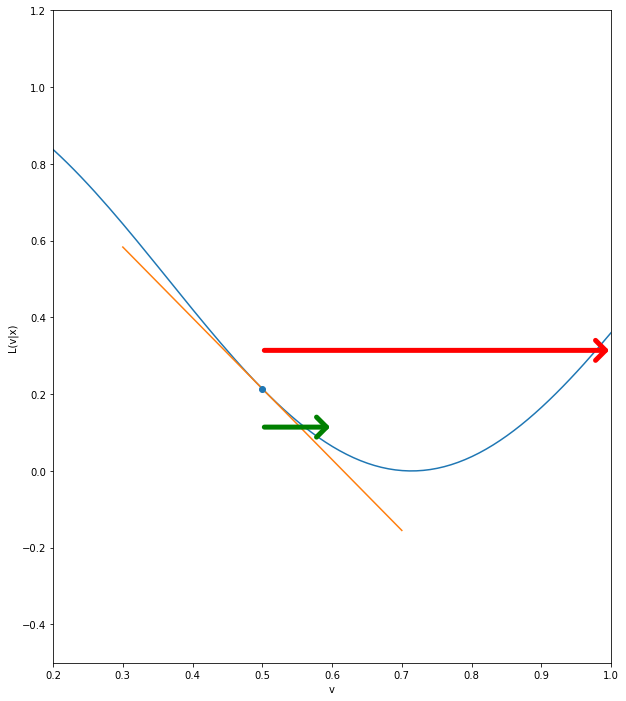

In [10]:
figGD = plt.figure(figsize = (10, 12))

# Create the plot 
plt.scatter(x, y, zorder=8)
plt.xlabel('v') 
plt.ylabel('L(v|x)') 
plt.plot(z, w)
plt.xlim((0.2,1))
plt.ylim((-0.5,1.2))

n=50
z1 = np.linspace(x-0.2, x+0.2, n) 
w1 = [ fp(x)*zi + (f(x)-fp(x)*x) for zi in z1 ] 
A=plt.plot(z1, w1)

e=0.1
d=0.5
plt.annotate("",  
             xy=(x+d,y+e),  
             xytext=(x,y+e),
             arrowprops=
             dict(
                 arrowstyle=mpatches.ArrowStyle("->", 
                                                head_length=1.,
                                                head_width=1.),
                 color="red", 
                 lw=5))
ignore=plt.annotate("",  
             xy=(x+e,y-e),  
             xytext=(x,y-e),
             arrowprops=
             dict(
                 arrowstyle=mpatches.ArrowStyle("->", 
                                                head_length=1.,
                                                head_width=1.),
                 color="green", 
                 lw=5))






# Gradient Descent in higher dimensions

Same thing really, but we have to have *partial derivatives* for each dimension, which makes it look more complicated. 

<img src="./assets/valley_with_ball.png" alt="valley" width="800"/>

Consider a 2-dimensional case,

1. Find the partial derivatives  
$$\begin{pmatrix}
\frac{\partial L(v_1,v_2|x)}{\partial v_1}\\
\frac{\partial L(v_1,v_2|x)}{\partial v_2}
\end{pmatrix}$$

2. Take a resonably long step
$$\begin{pmatrix} v'_1\\ v'_2\end{pmatrix} = \begin{pmatrix}v_1-\eta\frac{\partial  L(x,w)}{\partial v_1} \\ v_2-\eta\frac{\partial L(x,v)}{\partial v_2} \end{pmatrix}$$

(A vector of partial derivatives is called a **gradient**)

# Gradient descent in higher dimensions 

 #### Algorithm
 1. Initialize weights and biases randomly $\sim N(0, \sigma^2)$
 2. Loop until convergence:
     - For each weight $w_{i,j}$ and each bias $b_j$ :
         1. Compute partial derivatives:  
         $\begin{eqnarray}
         \frac{\partial L(w,b|x)}{\partial w_{i,j}}\\
         \frac{\partial L(w,b|x)}{\partial b_{j}}
         \end{eqnarray}$
         2. Update:  
         $\begin{eqnarray}
         w_{i,j} &=& w_{i,j} - \eta \frac{\partial L(w,b|x)}{\partial w_{i,j}}\\
         b_{j} &=& b_{j} - \eta \frac{\partial L(w,b|x)}{\partial b_{j}}
         \end{eqnarray}$
 3. Return final weights and biases
         

# Summary Learning

#### Cost function
\begin{eqnarray}
L(w,b) &=& \frac{1}{K}\sum_{k=1}^K  L(w,b|x^{(k)})\\
L(w,b|x) &=& \frac{1}{2}\sum_i\left(y_i-\hat{y}_i\right)^2
\end{eqnarray}

- Mean squared error (MSE)
- Residual sum of squares (RSS)

#### Gradient descent

- "Clever hill-climbing" in several dimensions
- Change all variables $v\in (w,b)$ by taking a reasonable step in opposite direction to the gradient 
\begin{equation}
v' = v-\eta \frac{\partial L(w,b|x)}{\partial v}
\end{equation}

**_For this to work, we need to be able to compute all $\frac{\partial L(w,b|x)}{\partial v}$ efficiently_**

# Back-propagation

Som intro here
- BP DP algorithm to perform gradient descent in ANNs
- iteratively (epochs)
- BP performed in each iteration/epoch

- Gradients is about derivatives
- a lot of derivatives
- compute them efficiently with BP

# Chain rule of derivation
##### A reminder


The chain rule simplifies derivation of complex functions and states that

$$\frac{d f(g(x))}{dx} = \frac{df(g(x))}{dg(x)} \times \frac{dg(x)}{d x} $$

Let $t=g(x)$, then
$$\frac{d f(g(x))}{dx} =\frac{d f(t)}{dx} = \frac{df(t)}{dt} \times \frac{dt}{dx}$$

<br>
<br>

##### An example

$f(g(x)) =\frac{1}{2}(y-x)^2$

$t = g(x) = y-x$

$f(t) = \frac{1}{2}t^2$

\begin{eqnarray}
\frac{d f(x)}{dx} &=& \frac{1}{2}\frac{d f(t)}{dt}\times\frac{d t}{dx}\\
%&=& \frac{1}{2}\frac{d f(t)}{dt}\times\frac{d g(x)}{dx}\\
&=& \frac{1}{2}\frac{d t^2}{dt}\times\frac{d (y-x)}{dx}\\
&=& \frac{2t}{2} \times -1\\
&=& (y-x) \times -1\\
&=& x-y
\end{eqnarray}


# Chain rule of derivation
##### A reminder


The chain rule simplifies derivation of complex functions and states that

$$\frac{d f(g(x))}{dx} = \frac{df(g(x))}{dg(x)} \times \frac{dg(x)}{d x} $$

Let $t=g(x)$, then
$$\frac{d f(g(x))}{dx} =\frac{d f(t)}{dx} = \frac{df(t)}{dt} \times \frac{dt}{dx}$$

<br>
<br>

##### Another example

The derivative of the sigmoid function:

$\sigma(x) = f(g(x)) = \frac{1}{1+e^{-x}} = \left(1+e^{-x}\right)^{-1}$

$t = g(x) = 1+e^{-x}$

$f(t) = t ^{-1}$

$$\begin{eqnarray*}
\frac{d\sigma(x)}{d x}
&=& \frac{d f(t)}{d t} \quad\times\quad \frac{d t}{d x}\\
&=& \frac{d t^{-1}}{d t} \quad\times\quad \frac{d 1-e^{-x}}{d x}\\
&=& -t^{-2} \quad\times\quad e^{-x}\\
&=& \frac{1}{\left(1+e^{-x}\right)^{2}} \times e^{-x}\\
&=& \frac{1}{\left(1+e^{-x}\right)} \frac{e^{-x}}{\left(1+e^{-x}\right)}\\
&=& \frac{1}{1+e^{-x}}\quad \left(1-\frac{1}{1+e^{-x}}\right)\\\\
&=& \sigma(x)\left(1-\sigma(x)\right)
\end{eqnarray*}$$

# Back propagation strategy

Use chain rule to split $\frac{L(b,w|x)}{\partial v}$ on $z$ and $a$ of each layer.

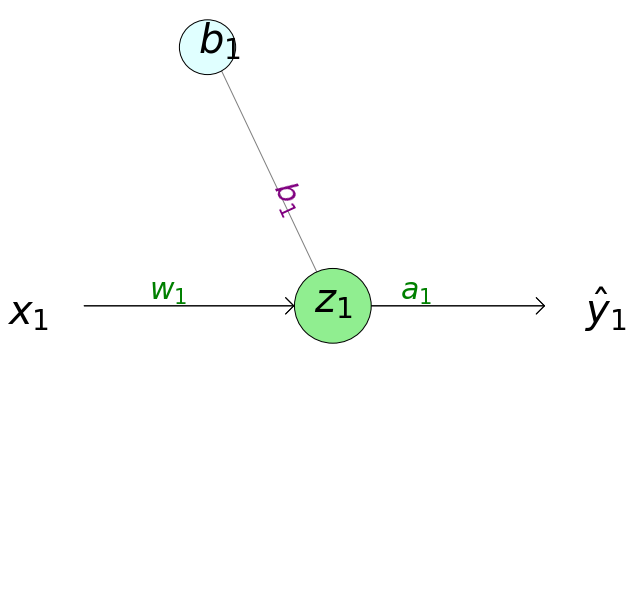

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from draw_neural_net import draw_neural_net

#-----1-1-1
layer_sizes = [1,1,1]

weights = [
    np.array(
        [
            [ "w_1"],
        ]
    ),
    np.array(
        [
            [ "a_1"],
        ]
    )
]
biases = [
    np.array(
        ["b_1"]
    ), 
    np.array(
        ["b_2"]
    )
]

figBP = plt.figure(figsize=(11, 11))
ax = figBP.gca()

ignore=ax.axis('off')

draw_neural_net(ax, 0,1.,0, 1.,
                layerSizes=layer_sizes, 
                weights=weights, biases=biases, 
                otherNodePrefix="z_{m}",
                hiddenLayerPrefix = "", outLayerPrefix = "", inLayerPrefix ="",
                hideInOutPutNodes=True, 
                edgeFontSize = 30, nodeFontSize = 40)
#fig.savefig('nn_digar00am.png')
plt.show()

$\hspace{1cm}\begin{eqnarray} 
\frac{\partial L(w,b|x)}{\partial w_1} &=&  \frac{\partial z_1}{\partial w_1}\times \frac{\partial a_1}{\partial z_1} \times \frac{\partial L(w,b|x)}{\partial a_1} 
\end{eqnarray}$

# Mini exercise

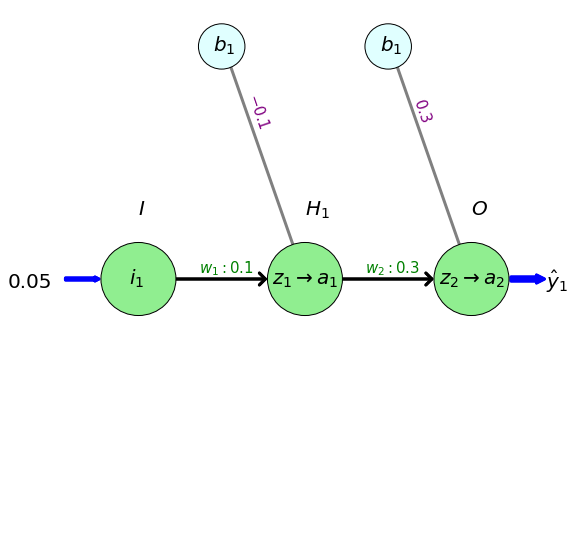

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from draw_neural_net import draw_neural_net

def sigma(z):
  return 1/(1+np.exp(-z))

#-----1-1-1
layer_sizes = [1,1,1]

x= 0.05
y = 0.1
i1 = x
w1 = 0.1
w2=0.3
b1 = -0.10
b2 = 0.30
z1 = w1*i1+b1
a1 = sigma(z1)
z2 = w2*a1+b2
a2 = sigma(z2)
C = 0.5 * (y-a2)**2
# z1 = round(z1, 2)
# a1 = round(a1, 2)
# z2 = round(z2, 2)
# a2 = round(a2, 2)
# C = round(C,2)

eta = 0.3

dcda2 = a2-y
da2dz2= a2*(1-a1)
dcdz2 = dcda2 * da2dz2
dz2da1 = w2
dcda1 = dcdz2 * dz2da1
da1dz1 = a1*(1-a1)
dcdz1 = dcdz2 * dz2da1
dz1dw1 = x
dcdw1 = dcdz1 * dz1dw1

wnew = w1 - eta * dcdw1

weights = [
    np.array(
        [
            ["w_1:{}".format(w1)]
         ]
    ),
    np.array(
        [
            [ "w_2:{}".format(w2)]
        ]
    )
]
biases = [
    np.array(
        ["{}".format(b1)]
    ), 
    np.array(
        ["{}".format(b2)]
    )
]

hidden = [
                np.array(
                [ r"$i_1$"]
                ),
                np.array(
                [ r"$z_1\rightarrow a_1$"]
                ),
                np.array(
                [ r"$z_2\rightarrow a_2$"]
                ),
]

figExercise = plt.figure(figsize=(10, 10))
ax = figExercise.gca()
ignore=ax.axis('off')

draw_neural_net(ax, 
                layerSizes = layer_sizes, 
                weights = weights, 
                otherNodePrefix = hidden,
                biases=biases, 
                inputPrefix = ["{}".format(x)], 
                nodeFontSize=20, edgeFontSize = 15, edgeWidth = 3
               )
#plt.show()

### Forward pass
$\begin{eqnarray}
z_j &=&  w_j a_{j-1} + b_j\\
a_j &=& \sigma(z_j) = \frac{1}{1+e^{-z_j}}
\end{eqnarray}$
- *hint!*: to compute $\sigma(z)$, use, e.g.
```
import tensorflow as tf
tf.sigmoid(z)
```

In [67]:
import pandas as pd

props1 = [
    ("font-size", "24px")
]

props2 = [
    ("font-size", "18px")
]
styles = [
    dict(selector="th", props = props1),
    dict(selector="td", props=props1)
]
styles2 = [
    dict(selector="th", props = props2),
    dict(selector="td", props=props2)
]

tab = pd.DataFrame(
    { 
        "x" : [format(x, ".2g")],
        "y" : [format(y, ".2g")],
        "z1" : [""], 
        "a1" : [""], 
        "z2" : [""],
        "a2" : [""],
        "haty" : [""],
        "C" : [""]
    }
)


colNames = { 
        "x" : r"$x$",
        "y" : r"$y$",
        "z1" : r"$z_1$", 
        "a1" : r"$a_1$",
        "z2" : r"$z_2$",
        "a2" : r"$a_2$",
        "haty" : r"$\hat{y}$",
        "C" : "$L(w,b|x)$"
}

pd.DataFrame.rename(tab,columns = colNames).style.hide_index().set_table_styles(styles)
#set_table_attributes('style="font-size: 14px"')
#html = (df.style.set_table_styles([{'selector': 'th', 'props': [('font-size', '5pt')]}]).set_properties(**{'font-size': '10pt'}).render()24

$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,,,,,,


# Mini exercise

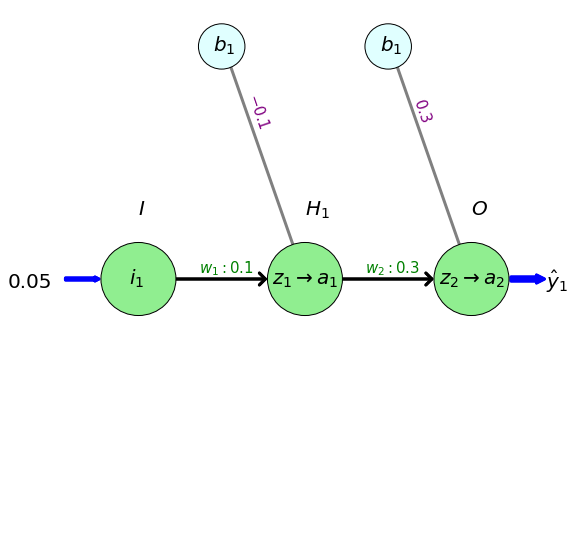

In [87]:
figExercise

### Forward pass
$\begin{eqnarray}
z_j &=&  w_j a_{j-1} + b_j\\
a_j &=& \sigma(z_j) = \frac{1}{1+e^{-z_j}}
\end{eqnarray}$
- *hint!*: to compute $\sigma(z)$, use, e.g.
```
import tensorflow as tf
tf.sigmoid(z)
```

In [15]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.rendered_html td { white-space: pre; }</style>"))

tab["z1"] = [format(z1, ".2g")]
tab["a1"] = [format(a1, ".2g")]
tab["z2"] = [format(z2, ".2g")]
tab["a2"] = [format(a2, ".2g")]
tab["haty"] = [format(a2, ".2g")]
tab["C"] = [format(C, ".2g").ljust(20, ".")]
#tab["C"] = tab["C"].str.pad(20, "right")
#tab.style.set_properties(subset=['C'], **{'width': '1300px'})

pd.DataFrame.rename(tab,columns = colNames).style.hide_index().set_table_styles(styles)
#pd.DataFrame.rename(tab,columns = colNames).\
#style.hide_index().\
#set_table_attributes('style="font-size: 8px"')
#.style.set_properties(subset=['C'], **{'width-min': '300px'})
#.applymap(lambda x: str(x).ljust(2000))
#format(C, ".2g").rjust(6," ")
#xtab.dtypes

$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


# Mini exercise

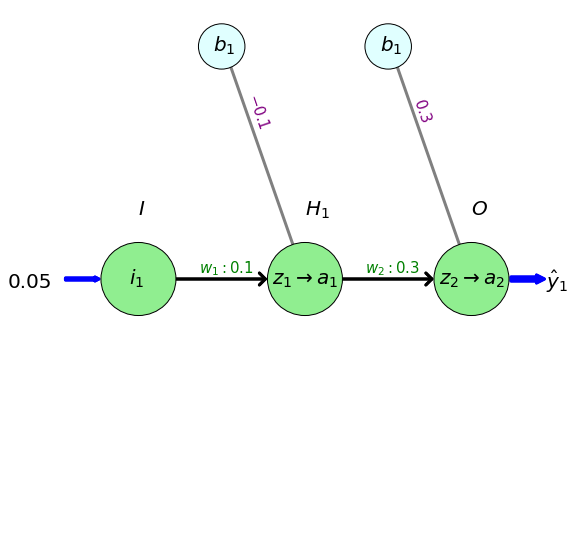

In [88]:
figExercise

### Backward pass 1
$\begin{eqnarray}
\frac{\partial L(w,b|x)}{\partial a_2} 
&=&  \frac{\partial \frac{1}{2}(y-a_2)^2}{\partial a_2} \\
&=& a_2 -y
\end{eqnarray}$

In [17]:
tab1=pd.DataFrame.rename(tab,columns = colNames).\
style.hide_index().\
set_table_styles(styles2)
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [18]:
tab2 = pd.DataFrame(
    { 
        "wnew" : ["   "],
        "dcdw1" : ["   "],
        "dz1dw1" : ["   "],
        "dcdz1" : ["   "], 
        "da1dz1" : ["   "], 
        "dcda1" : ["   "],
        "dz2da1" : ["   "],
        "dcdz2" : ["   "],
        "da2dz2" : ["   "],
        "dcda2" : ["   "],
    }
)


colNames = { 
        "wnew" : r"$w'_1$",
        "dcdw1" : r"$\frac{\partial L(w,b|x)}{\partial w_1}$",
        "dz1dw1" : r"$\frac{\partial z_1}{\partial w_1}$",
        "dcdz1" : r"$\frac{\partial L(w,b|x)}{\partial z_1}$",
        "da1dz1" : r"$\frac{\partial a_1}{\partial z_1}$",
        "dcda1" : r"$\frac{\partial L(w,b|x)}{\partial a_1}$",
        "dz2da1" : r"$\frac{\partial z_2}{\partial a_1}$",
        "dcdz2" : r"$\frac{\partial L(w,b|x)}{\partial z-2}$",
        "da2dz2" : r"$\frac{\partial a_2}{\partial z_2}$",
        "dcda2" : r"$\frac{\partial L(w,b|x)}{\partial a_2}$",

    }

pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,,,,,


# Mini exercise

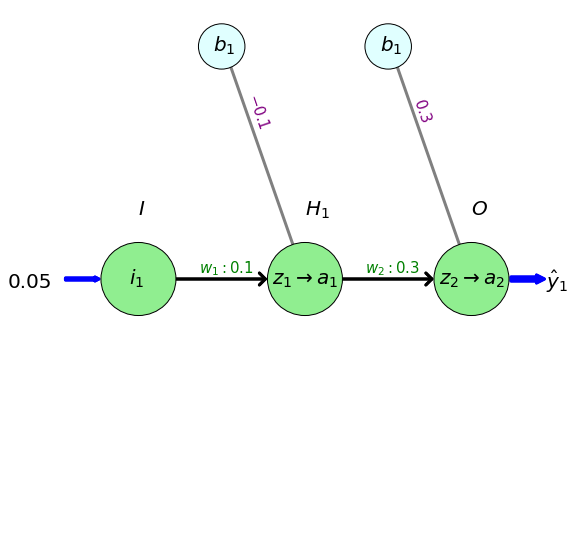

In [76]:
figExercise

### Backward pass 1
$\begin{eqnarray}
\frac{\partial L(w,b|x)}{\partial a_2} 
&=&  \frac{\partial \frac{1}{2}(y-a_2)^2}{\partial a_2} \\
&=& a_2 -y
\end{eqnarray}$

In [20]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [21]:
tab2["dcda2"] = [format(dcda2, ".2g").ljust(13, ".")]
stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,,,,,0.51.........


# Mini exercise

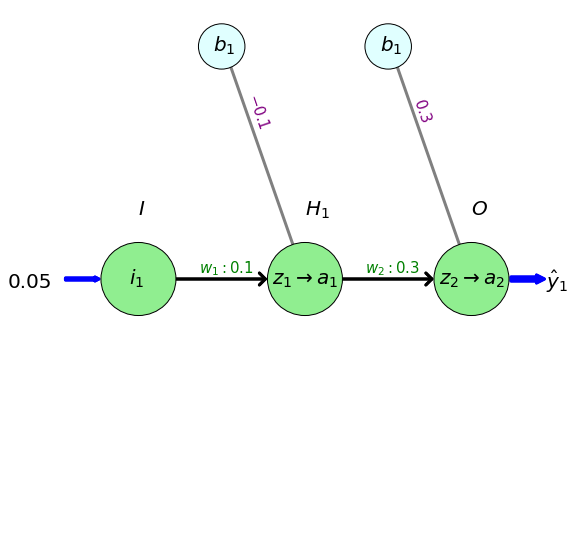

In [77]:
figExercise

### Backward pass 2
$\begin{eqnarray}
\frac{\partial a_2}{\partial z_2} 
&=&  \frac{\partial \sigma(z)}{\partial a}
&=& \sigma(z)(1-\sigma(z))
\end{eqnarray}$

$\begin{eqnarray}
\frac{\partial L(w,b|x)}{\partial z_2} 
&=&  \frac{\partial a_2}{\partial z_2} \times \frac{\partial L(w,b|x)}{\partial a_2}
\end{eqnarray}$

In [23]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [24]:
tab2["dcda2"] = [format(dcda2, ".2g").ljust(13, ".")]
stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,,,,,0.51.........


# Mini exercise

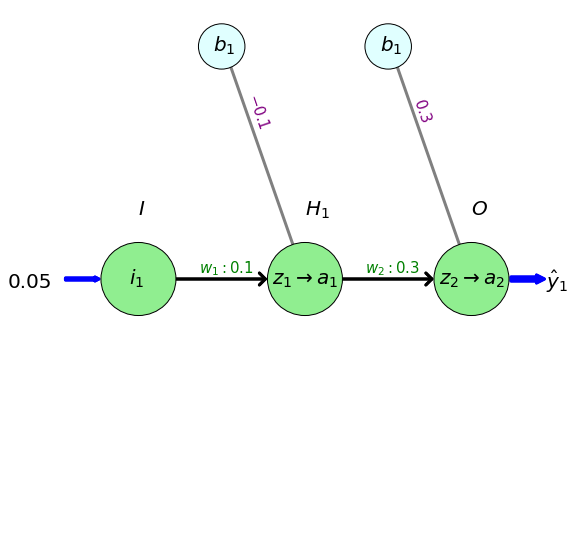

In [78]:
figExercise

### Backward pass 2
$\begin{eqnarray}
\frac{\partial a_2}{\partial z_2} 
&=&  \frac{\partial \sigma(z)}{\partial a}
&=& \sigma(z)(1-\sigma(z))
\end{eqnarray}$

$\begin{eqnarray}
\frac{\partial L(w,b|x)}{\partial z_2} 
&=&  \frac{\partial a_2}{\partial z_2} \times \frac{\partial L(w,b|x)}{\partial a_2}
\end{eqnarray}$

In [26]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [27]:
tab2["da2dz2"] = [format(da2dz2, ".2g").ljust(6, ".")]
tab2["dcdz2"] = [format(dcdz2, ".2g").ljust(13, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,,,0.16.........,0.32..,0.51.........


# Mini exercise

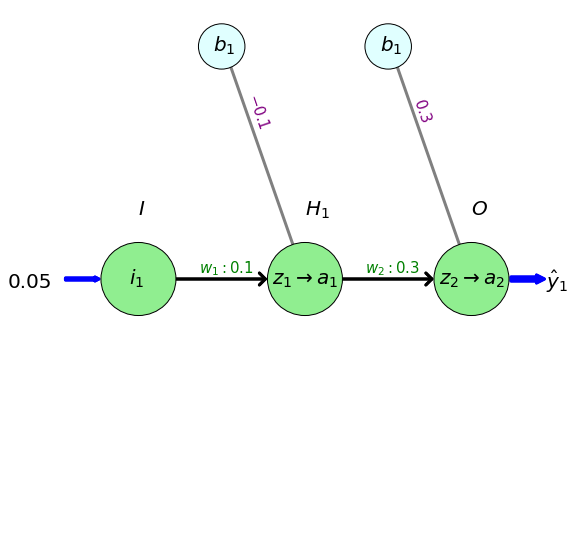

In [79]:
figExercise

### Backward pass 3
$\begin{eqnarray}
\frac{\partial z_2}{\partial a_1} 
&=&  \frac{\partial w_2*a_1+b_1}{\partial a} = w_2
\end{eqnarray}$

$\begin{eqnarray}
\frac{\partial L(w,b|x)}{\partial a_1} 
&=&  \frac{\partial z_2}{\partial a_1} \times \frac{\partial L(w,b|x)}{\partial z_2}
\end{eqnarray}$

In [29]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [30]:
tab2["da2dz2"] = [format(da2dz2, ".2g").ljust(6, ".")]
tab2["dcdz2"] = [format(dcdz2, ".2g").ljust(13, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,,,0.16.........,0.32..,0.51.........


# Mini exercise

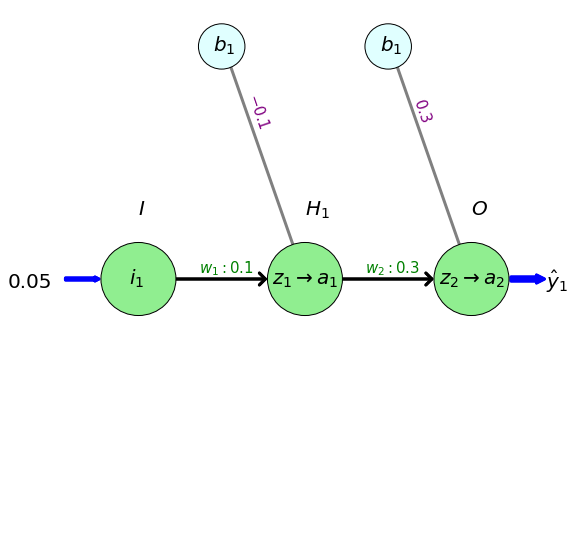

In [80]:
figExercise

### Backward pass 3
$\begin{eqnarray}
\frac{\partial z_2}{\partial a_1} 
&=&  \frac{\partial w_2*a_1+b_1}{\partial a} = w_2
\end{eqnarray}$

$\begin{eqnarray}
\frac{\partial L(w,b|x)}{\partial a_1} 
&=&  \frac{\partial z_2}{\partial a_1} \times \frac{\partial L(w,b|x)}{\partial z_2}
\end{eqnarray}$

In [32]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [33]:
tab2["dz2da1"] = [format(dz2da1, ".2g").ljust(6, ".")]
tab2["dcda1"] = [format(dcda1, ".2g").ljust(13, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,0.049........,0.3...,0.16.........,0.32..,0.51.........


# Mini exercise

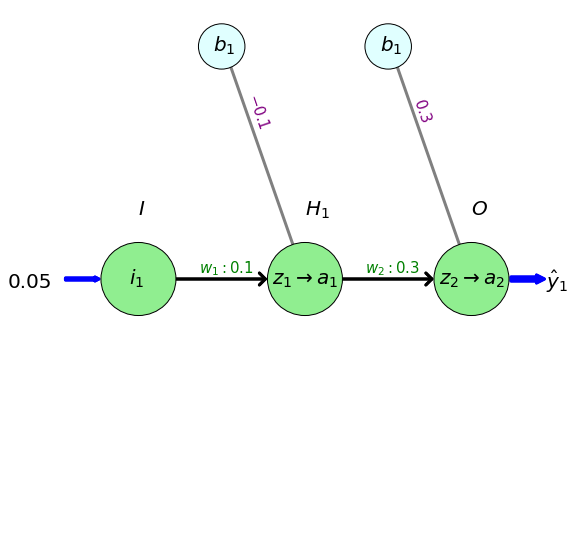

In [81]:
figExercise

### Backward pass 4
$\begin{eqnarray}
\frac{\partial a_1}{\partial z_1} 
&=&  \frac{\partial \sigma(z_1)}{\partial a_1} = \sigma(z_1)(1-\sigma(z_1))
\end{eqnarray}$

$\begin{eqnarray}
\frac{\partial L(w,b|x)}{\partial z_1} 
&=&  \frac{\partial a_1}{\partial z_1} \times \frac{\partial L(w,b|x)}{\partial a_1}
\end{eqnarray}$

In [35]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [36]:
tab2["dz2da1"] = [format(dz2da1, ".2g").ljust(6, ".")]
tab2["dcda1"] = [format(dcda1, ".2g").ljust(13, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,,,0.049........,0.3...,0.16.........,0.32..,0.51.........


# Mini exercise

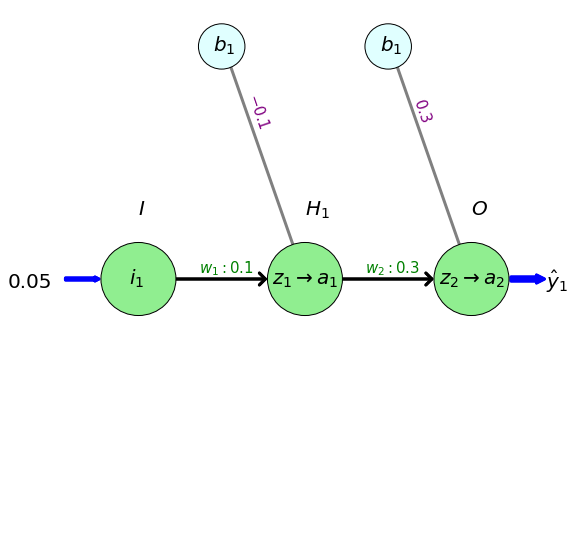

In [82]:
figExercise

### Backward pass 4
$\begin{eqnarray}
\frac{\partial a_1}{\partial z_1} 
&=&  \frac{\partial \sigma(z_1)}{\partial a_1} = \sigma(z_1)(1-\sigma(z_1))
\end{eqnarray}$

$\begin{eqnarray}
\frac{\partial L(w,b|x)}{\partial z_1} 
&=&  \frac{\partial a_1}{\partial z_1} \times \frac{\partial L(w,b|x)}{\partial a_1}
\end{eqnarray}$

In [38]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [39]:
tab2["da1dz1"] = [format(da1dz1, ".2g").ljust(6, ".")]
tab2["dcdz1"] = [format(dcdz1, ".2g").ljust(12, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,0.049.......,0.25..,0.049........,0.3...,0.16.........,0.32..,0.51.........


# Mini exercise

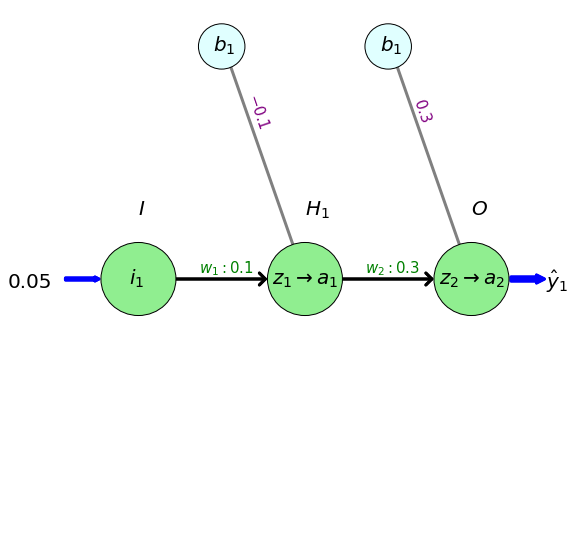

In [83]:
figExercise

### Backward pass 5
$\begin{eqnarray}
\frac{\partial z_1}{\partial w_1} &=&  \frac{\partial w_1a_1+b_1}{\partial a_1} = a_1
\end{eqnarray}$

$\begin{eqnarray}
\frac{\partial L(w_1,b|x)}{\partial z_1} 
&=&  \frac{\partial z_1}{\partial w_1} \times \frac{\partial L(w_1,b|x)}{\partial z_1}
\end{eqnarray}$

In [41]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [42]:
tab2["da1dz1"] = [format(da1dz1, ".2g").ljust(6, ".")]
tab2["dcdz1"] = [format(dcdz1, ".2g").ljust(12, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2


$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,,,0.049.......,0.25..,0.049........,0.3...,0.16.........,0.32..,0.51.........


# Mini exercise

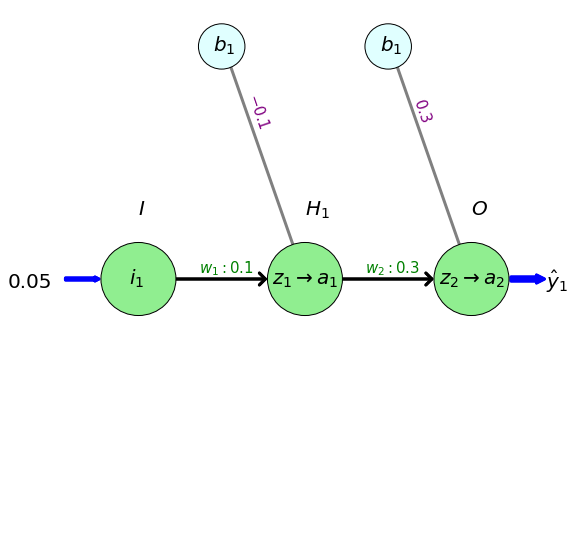

In [84]:
figExercise

### Backward pass 5
$\begin{eqnarray}
\frac{\partial z_1}{\partial w_1} &=&  \frac{\partial w_1a_1+b_1}{\partial a_1} = a_1
\end{eqnarray}$

$\begin{eqnarray}
\frac{\partial L(w_1,b|x)}{\partial z_1} 
&=&  \frac{\partial z_1}{\partial w_1} \times \frac{\partial L(w_1,b|x)}{\partial z_1}
\end{eqnarray}$

In [44]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [45]:
tab2["dz1dw1"] = [format(dz1dw1, ".2g").ljust(6, ".")]
tab2["dcdw1"] = [format(dcdw1, ".2g").ljust(12, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2

$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.0024......,0.05..,0.049.......,0.25..,0.049........,0.3...,0.16.........,0.32..,0.51.........


# Mini exercise

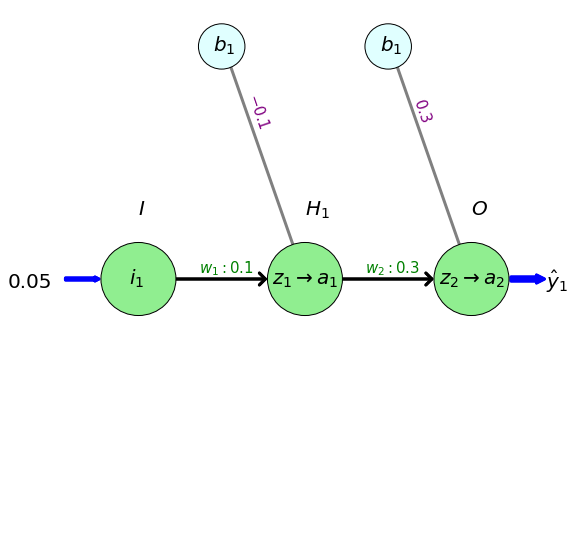

In [85]:
figExercise

### Update $w_1$
Let $\eta=$ {{ eta }}, then 

$\begin{eqnarray}
w'_1 &=& w_1 - \eta \frac{\partial L(w_1,b|x)}{\partial z_1}
\end{eqnarray}$

In [47]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [48]:
tab2["dz1dw1"] = [format(dz1dw1, ".2g").ljust(6, ".")]
tab2["dcdw1"] = [format(dcdw1, ".2g").ljust(12, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).style.hide_index().set_table_styles(styles)
stab2

$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.0024......,0.05..,0.049.......,0.25..,0.049........,0.3...,0.16.........,0.32..,0.51.........


# Mini exercise

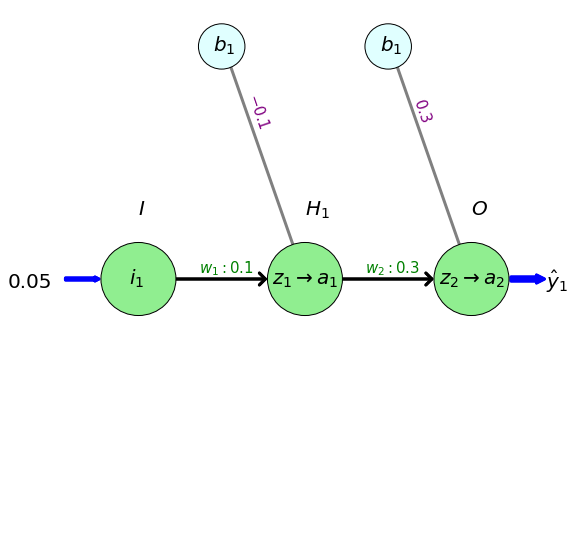

In [86]:
figExercise

### Update $w_1$
Let $\eta=$ {{ eta }}, then 

$\begin{eqnarray}
w'_1 &=& w_1 - \eta \frac{\partial L(w_1,b|x)}{\partial z_1}
\end{eqnarray}$

In [50]:
tab1


$x$,$y$,$z_1$,$a_1$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.1,-0.095,0.48,0.44,0.61,0.61,0.13................


In [51]:
tab2["wnew"] = [format(wnew, ".2g").ljust(6, ".")]

stab2=pd.DataFrame.rename(tab2,columns = colNames).\
style.hide_index().\
set_table_styles(styles)
stab2

$w'_1$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,"$\frac{\partial L(w,b|x)}{\partial z_1}$",$\frac{\partial a_1}{\partial z_1}$,"$\frac{\partial L(w,b|x)}{\partial a_1}$",$\frac{\partial z_2}{\partial a_1}$,"$\frac{\partial L(w,b|x)}{\partial z-2}$",$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
0.099.,0.0024......,0.05..,0.049.......,0.25..,0.049........,0.3...,0.16.........,0.32..,0.51.........


# More neurons per layer

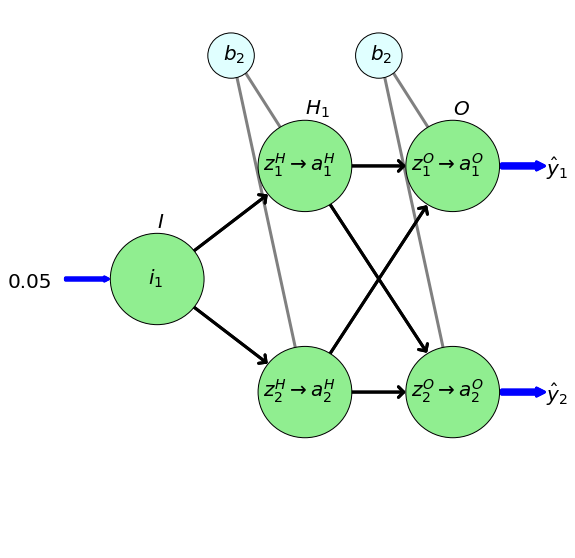

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from draw_neural_net import draw_neural_net

#-----1-1-1
layer_sizes = [1,2,2]

weights = [
    np.array(
        [
            ["w_{}"]
         ]
    ),
    np.array(
        [
            [ "w_2:{}".format(w2)]
        ]
    )
]
biases = [
    np.array(
        ["{}".format(b1)]
    ), 
    np.array(
        ["{}".format(b2)]
    )
]

hidden = [
                np.array(
                [ r"$i_1$"]
                ),
                np.array(
                    [
                        r"$z_1^H\rightarrow a_1^H$",
                        r"$z_2^H\rightarrow a_2^H$"
                    ]
                ),
                np.array(
                    [
                        r"$z_1^O\rightarrow a_1^O$",
                        r"$z_2^O\rightarrow a_2^O$"
                    ]
                ),
]

figExercise2 = plt.figure(figsize=(10, 10))
ax = figExercise2.gca()
ignore=ax.axis('off')

draw_neural_net(ax, 
                layerSizes = layer_sizes, 
                #weights = weights,
                otherNodePrefix = hidden,
                #biases=biases, 
                inputPrefix = ["{}".format(x)], 
                nodeFontSize=20, edgeFontSize = 15, edgeWidth = 3
               )
#plt.show()

#### Output layer
- Same as with one neuron

#### Hidden layer
- Need to sum over neurons in next layer, e.g.:
$\frac{\partial L(w,b|x)}{\partial a^H_i}  = \sum_j w_{i,j}\frac{\partial L(w,b|x)}{\partial z_j^O}$

#### What does Tensorflow do?
- Improve computation efficiency using matrix algebra

1. Per layer, collect
    - partial derivatives as gradients 
    - weights as matrix

2. Over training data, collect
    - *tensors* of gradients
    - *tensors* of weight matrices

#### "Tensors flows through the network!"

(tensors $\approx$ "matrices of any dimension")

# Summary -- Back-propagation

##### Efficient computation of partial derivatives $\frac{\partial L(w,b|x)}{\partial v}, v\in w\cup b$

+ Chain rule allows computing partial derivatives layer-wise, backwards
+ By collecting gradients and weights for layers in *tensors* over all training data, all computations in one epoch can be computed at the ame time for all training data

# Summary lecture
### Neurons and network
- Weights, 
- Biases
- (Sigmoid) activation function
- Forward pass

### Learning
- Iterative
- Supervised
- Loss function,
- Gradient descent
- Back propagation
- Backward pass

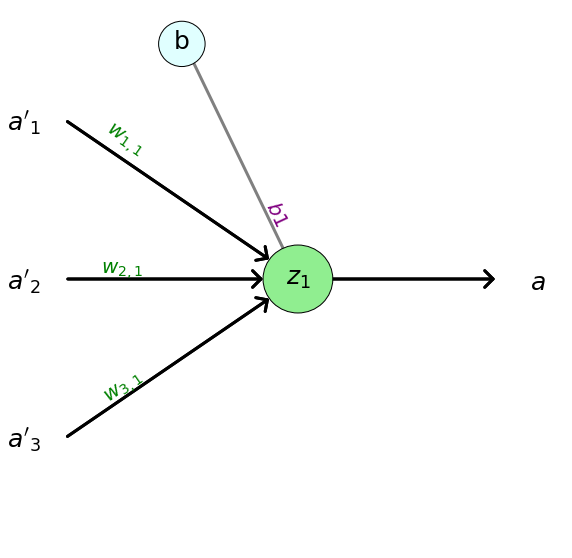

In [53]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'common_assets')))
import numpy as np
import matplotlib.pyplot as plt
from draw_neural_net import draw_neural_net

layer_sizes = [3,1,1]

weights = [
    np.array(
        [
            ["w_{1,1}"],
            ["w_{2,1}"], 
            ["w_{3,1}"],
        ]
    ),
    np.array(
        [
            [""]
        ]
    )

]
biases = [
    np.array(
        ["b1"]
    ), 
    np.array(
        ["b_2"]
    )
]
figNeuron = plt.figure(figsize=(10, 10))
ax = figNeuron.gca()
ax.axis('off')

draw_neural_net(ax,
                layerSizes=layer_sizes, 
                weights=weights, 
                biases=biases, 
                hiddenLayerPrefix = "", 
                outLayerPrefix = "", 
                inLayerPrefix ="", 
                biasNodePrefix = "b",
                inputPrefix = "a'", 
                outputPrefix = "a", 
                otherNodePrefix =  r"z_{m}",
                hideInOutPutNodes=True,
                nodeFontSize = 25,
                edgeFontSize = 20, 
                edgeWidth = 3
               )



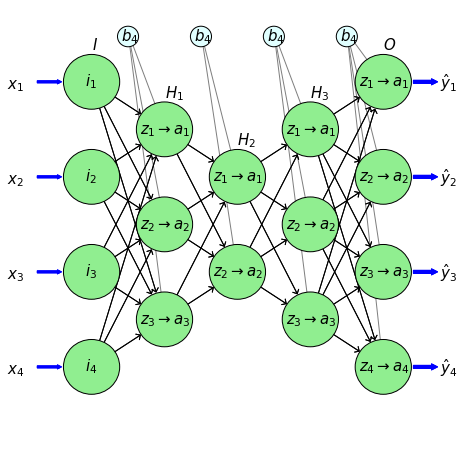

In [54]:
layer_sizes = [ 4, 3, 2, 3, 4 ]
weights = [
    np.array(
        [
            [ "w_{1,1}", "w_{1,2}", "w_{1,3}"],
            [ "w_{2,1}", "w_{2,2}", "w_{2,3}"],
            [ "w_{3,1}", "w_{3,2}", "w_{3,3}"],
            [ "w_{4,1}", "w_{4,2}", "w_{4,3}"]
        ]
    ),

    np.array(
        [
            [ "w_{1,1}", "w_{1,2}"],
            [ "w_{2,1}", "w_{2,2}"],
            [ "w_{3,1}", "w_{3,2}"]

        ]
    ),

 #   np.array(
 #       [
 #           [ "w_{1,1}", "w_{1,2}"],
 #           [ "w_{2,1}", "w_{2,2}"],
 #       ]
 #  ),
        np.array(
        [
            [ "w_{1,1}", "w_{1,2}", "w_{1,3}"],
            [ "w_{2,1}", "w_{2,2}", "w_{2,3}"]
        ]
    ),
        np.array(
        [
            [ "w_{1,1}", "w_{1,2}", "w_{1,3}","w_{1,4}"],
            [ "w_{2,1}", "w_{2,2}", "w_{2,3}","w_{2,4}"],
            [ "w_{3,1}", "w_{3,2}", "w_{3,3}","w_{3,4}"]
        ]
    )
]
biases = [
    np.array(
        ["b_1", "b_2","b_3"]
    ), 
    np.array(
        ["b_1", "b_2"]
    ), 
    np.array(
        ["b_1", "b_2", "b_3"]
    ), 
    np.array(
        ["b_1", "b_2", "b_3", "b_4"]
    ), 


]

figAE = plt.figure(figsize=(8,8))

ax = figAE.gca()
ax.axis('off')

draw_neural_net(ax, layerSizes=layer_sizes) #, weights= weights, biases=biases)




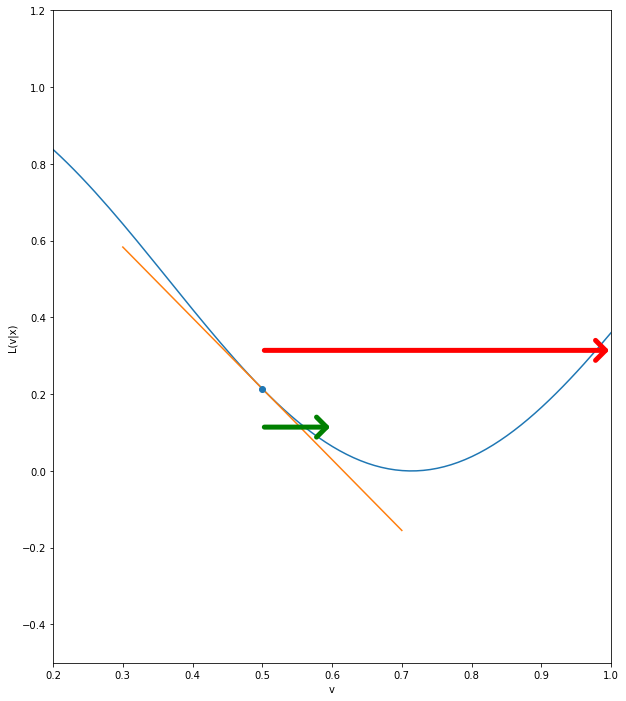

In [55]:
figGD

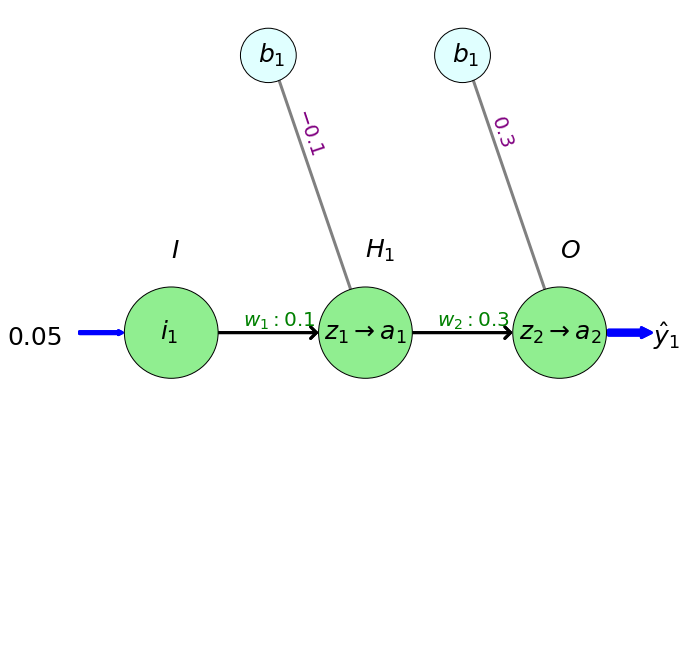

In [56]:
figExercise

### ANN BB !

- pick mtrl from Claudio's [neural_networks](<http://.PreviousMtlrToPickFrom/ann_dnn_medbioinfo/neural_networks.pdf>) and Bengt's [ann1](./PreviousMtlrToPickFrom/ann1/ann1.html)

<!--
#### Biological neurons
- Bengt's or claudio's fi
#### First artificial neuron model: perceptron (not here?)
- linear model
  - weights
  - bias
- step activation
- "Not good for training -- more later"
- New figs
#### sigmoid neuron
- Logistic model (without residual variation model)~~~
- new figs
#### FFANN
- Layers
  - input
  - hidden
    - "deep"
  - output
- edges
  - all-to-all between sequential layers
- new figs
- "connect log model can do more than just Logistic regression"
  - examples...
  - [playground](http://playground.tensorflow.org/)

#### Learning
- regression closed form not working
- Cross validation
- Loss/cost/etc function MSE
  - residuals, SS
  - MSE cross-validation
- new figs
#### Gradient descent
- "Clever hill-climbing"
  - derivative/partial derivative/gradient visually shows which way down is"
    - (no detailed math at this point)
    - learning rate
  - (Bengt's + Claudio's figs)
  - algorithm (Claudio's)
#### Backprop
- chain rule
  - example: sigmoid function ?
- use chain rule to split by z (net) and a (out)
  - dJ/dw = dJ/da * da/dz * dz/dw
- Using Paulo's pedagogical approach! (slight variant)
  - 2 (hmm, or maybe  1, and add another layer later) hidden layer,
  1 neuron per layer, given weights and biases
    - forward pass. (here or earlier?)
    - backward pass
      - by layer
  - add one neuron to last hidden layer (or to both hidden layers) to existing network
    - do new neuron in last hidden layer
    - first hidden layer
      - dJ/da
        - show weighted summation over neurons in last hidden layer
      - do da/dz and dz/dw as well
    - Take-home:
      - Need to do all partial derivatives in one layer before doing
      the one in the preceeding layer
      - Can use vector mulktiplication
        - collect partial derivatives for last layer in column vector G = Gradient
        - collect incoming weights to one neuron in preceeding layer in row vector w
        - do vector multiplication w x G and show that it produces the sum!
        - DP?
      - *Softwares* use matrix multiplication (hand-waving)
        - collect weights vectors in matrix W (as rows)
        - multiply W x G gives dJ/da for whole layer!
        - (also forward pass can be done with matrix algebra)
        - so information is passed through network layers as vectors or
        matrices
        - additionally, all datasets can be fed to the network in one go
          - adds dimension -> tensors
          - *tensors flows through the network.*
-->

In [57]:
%sh jupyter nbconvert session_annBuildingBlocks_1.ipynb --to slides 

UsageError: Line magic function `%sh` not found (But cell magic `%%sh` exists, did you mean that instead?).
